## Animation: &thinsp; precipitation extremes location on on days with high DOC

- Regions exceeding pr99 tend to be in aggregated states
<br>
<br>
- ROME performs better in predicting days of high precipitation extremes

In [7]:
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import cartopy

import os
home = os.path.expanduser("~")

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

In [8]:
def plot_scene(scene, cmap='Reds', title='', vmin=None, vmax=None,fig_width=17.5 ,fig_height=8):
    projection = cartopy.crs.PlateCarree(central_longitude=180)
    lat = scene.lat
    lon = scene.lon

    f, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=(fig_width, fig_height))
    scene.plot(transform=cartopy.crs.PlateCarree(), cbar_kwargs={'orientation': 'horizontal','pad':0.125, 'aspect':50,'fraction':0.055}, cmap=cmap, vmin=vmin, vmax=vmax)
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())
    ax.set_title(title)
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_xticklabels([0, 90, 180, 270, 360])
    ax.set_yticks([-20, 0, 20])
    plt.tight_layout()

In [9]:
models = [
    # 'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]
model = models[0]

experiments = [
    'historical',
    # 'rcp85'
    ]
experiment = experiments[0]


folder = home + '/Documents/data/cmip5/ds/' + model
fileName = model + '_precip_' + experiment + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
precip = ds['precip']
precip.attrs['units']= 'mm/day'


percentile_options = [
    # 'pr95',
    # 'pr97',
    'pr99',
    # 'pr999',
    ]
percentile_option = percentile_options[0]
folder = home + '/Documents/data/cmip5/' + model
fileName = model + '_prPercentiles_' + experiment + '.nc'
path = folder + '/' + fileName
prPercentiles = xr.open_dataset(path)


rome_options = [
    'rome',
    # 'rome_n'
    ]
rome_option = rome_options[0]
folder = home + '/Documents/data/cmip5/' + model
fileName = model + '_rome_' + experiment + '.nc'
path = folder + '/' + fileName
rome = xr.open_dataset(path)

FileNotFoundError: [Errno 2] No such file or directory: b'/Users/cbla0002/Documents/data/cmip5/ds/GFDL-CM3/GFDL-CM3_precip_historical.nc'

In [ ]:
precip

<xarray.DataArray 'precip' (time: 10957, lat: 22, lon: 128)>
[30854912 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T12:00:00 ... 1999-12-31T12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    units:    mm/day

In [ ]:
prPercentiles

<xarray.Dataset>
Dimensions:  (time: 10957)
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T12:00:00 ... 1999-12-31T12:00:00
Data variables:
    pr95     (time) float64 ...
    pr97     (time) float64 ...
    pr99     (time) float64 ...
    pr999    (time) float64 ...

In [ ]:
rome

<xarray.Dataset>
Dimensions:  (time: 10957)
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T12:00:00 ... 1999-12-31T12:00:00
Data variables:
    rome     (time) float64 ...
    rome_n   (time) float64 ...
Attributes:
    description:  ROME based on all and the 8 largest contiguous convective r...
    units:        km^2

In [ ]:
percentile_option

'pr99'

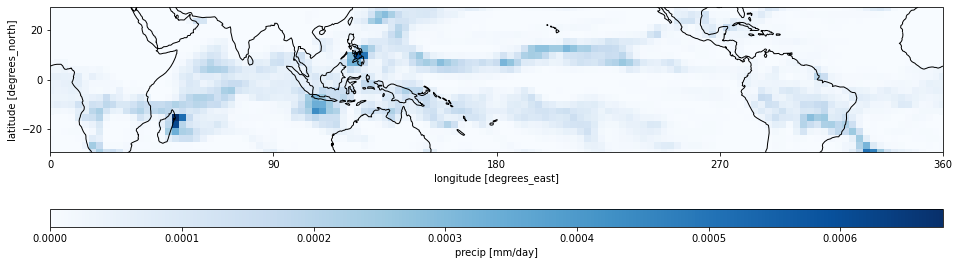

In [ ]:
plot_scene(precip.isel(time=0), 'Blues')

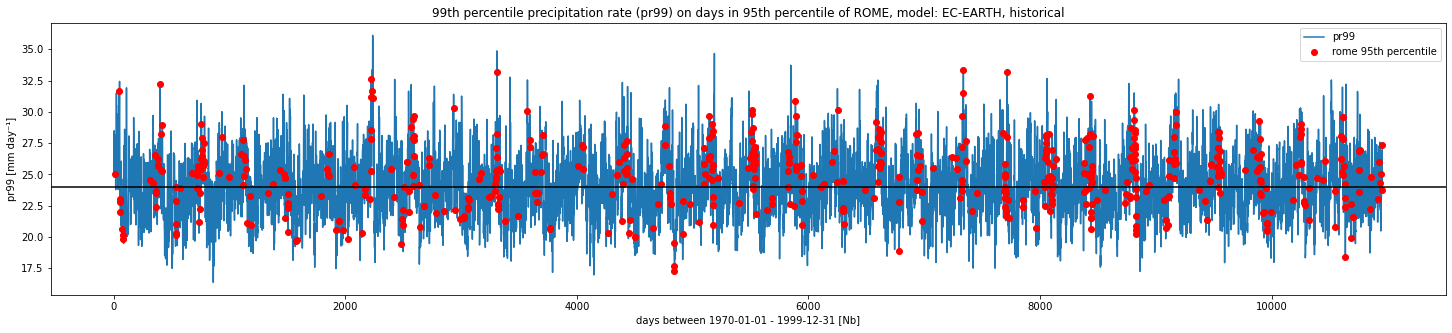

In [ ]:
f, ax = plt.subplots(figsize = (25,5))

y = prPercentiles[percentile_option].data
x= np.arange(0,len(y))

rome_threshold = 95
rome_prctile = np.percentile(rome[rome_option],rome_threshold)
x_rome= np.squeeze(np.argwhere(rome[rome_option].data>=rome_prctile))

ax.plot(x,y,zorder=0, label=percentile_option)
ax.scatter(x_rome,y[x_rome], label=rome_option + ' ' + str(rome_threshold) + 'th percentile', color='r')
ax.axhline(y=np.mean(y), color='k')
ax.set_title(percentile_option[-2:] + 'th percentile precipitation rate (' + 
             percentile_option + ') on days in ' + 
             str(rome_threshold) + 'th percentile of ROME, model: ' + model + ', ' + experiment)
ax.set_xlabel('days between ' + str(prPercentiles[percentile_option].coords['time'][0].values)[:10] 
              +' - '+ str(prPercentiles[percentile_option].coords['time'][-1].values)[:10] + ' [Nb]')
ax.set_ylabel(percentile_option + ' [mm day' + chr(0x207B) + chr(0x00B9) + ']')
ax.legend()

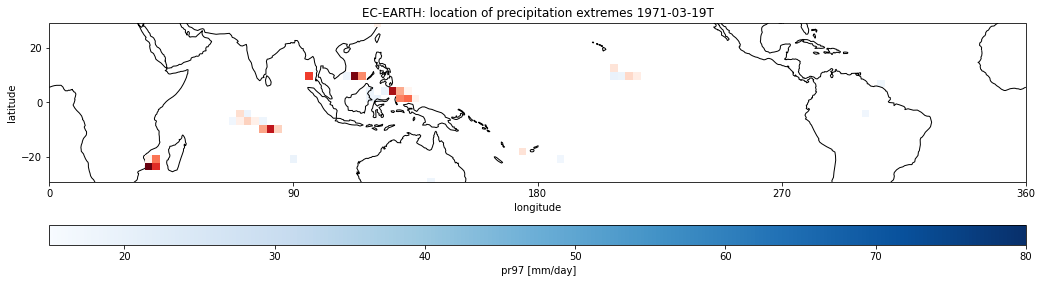

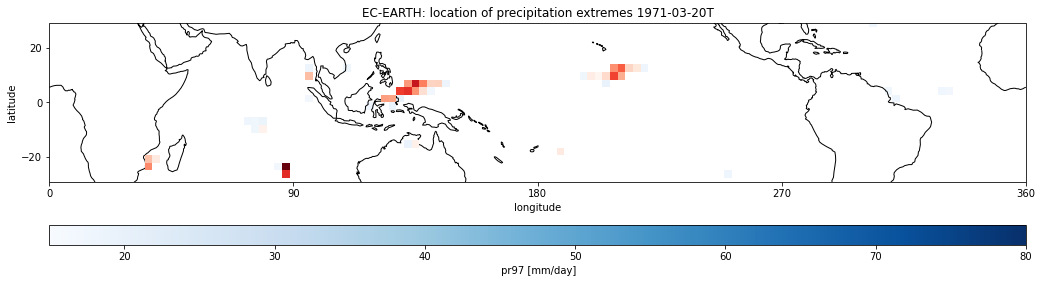

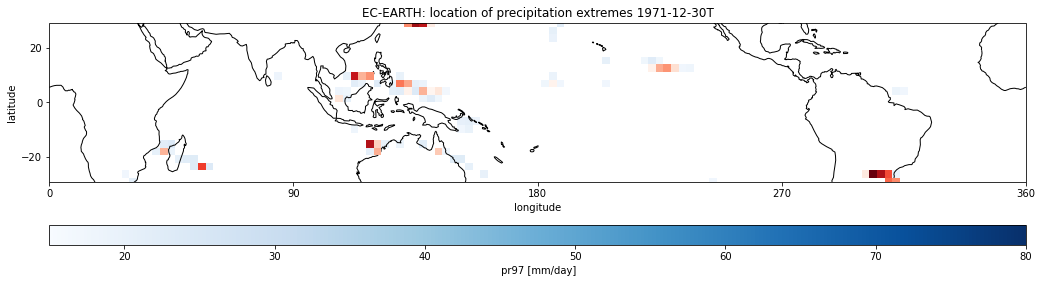

In [ ]:
lat = precip.lat
lon = precip.lon
lonm,latm = np.meshgrid(lon,lat)
conv_threshold = prPercentiles['pr97'].mean(dim=('time'))

rome_threshold = 98
rome_prctile = np.percentile(rome[rome_option],rome_threshold)
x_rome= np.squeeze(np.argwhere(rome[rome_option].data>=rome_prctile))

for x in x_rome[0:3]:
    fig= plt.figure(figsize=(17.5,8))
    ax = fig.add_subplot(projection=cartopy.crs.PlateCarree(central_longitude=180))

    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

    pr_day = precip.isel(time=x)
    extreme_percentileDay = prPercentiles[percentile_option].isel(time=x).data

    pcm = ax.pcolormesh(lonm,latm, pr_day.where(pr_day>conv_threshold),transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Blues', vmin=15, vmax=80)
    ax.pcolormesh(lonm,latm, pr_day.where(pr_day>extreme_percentileDay),transform=cartopy.crs.PlateCarree(), cmap='Reds')

    ax.set_title(model + ': location of precipitation extremes ' + str(pr_day.coords['time'].values)[:11] )
    ax.set_xlabel('longitude')
    ax.set_ylabel('latitude')

    ax.set_yticks([-20, 0, 20])
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_xticklabels([0, 90, 180, 270, 360])

    plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.10, aspect=50, fraction=0.055, label = ' pr97 [mm/day]')


In [ ]:
fig= plt.figure(figsize=(20,7.5))

lat = precip.lat
lon = precip.lon
lonm,latm = np.meshgrid(lon,lat)
conv_threshold = prPercentiles['pr97'].mean(dim=('time'))

rome_threshold = 99.5
rome_prctile = np.percentile(rome[rome_option],rome_threshold)
x_rome= np.squeeze(np.argwhere(rome[rome_option].data>=rome_prctile))

def animate(frame):    
    ax = fig.add_subplot(projection=cartopy.crs.PlateCarree(central_longitude=180))

    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

    pr_day = precip.isel(time=x_rome[frame])
    extreme_percentileDay = prPercentiles[percentile_option].isel(time=x_rome[frame]).data

    ax.pcolormesh(lonm,latm, pr_day.where(pr_day>conv_threshold),transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Blues', vmin=15, vmax=80)
    pcm= ax.pcolormesh(lonm,latm, pr_day.where(pr_day>extreme_percentileDay),transform=cartopy.crs.PlateCarree(), cmap='Reds', vmin=10, vmax=80)

    ax.set_title(model + ': location of precipitation extremes (red) in convective regions (blue)')
    ax.set_xlabel('longitude')
    ax.set_ylabel('latitude')

    ax.set_yticks([-20, 0, 20])
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_xticklabels([0, 90, 180, 270, 360])

    plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.10, aspect=50, fraction=0.055, label = percentile_option + ' [mm/day]')
    plt.close()

ani1 = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=25,       # Could also be iterable or list
    interval=500     # ms between frames
    )

<Figure size 1440x540 with 0 Axes>

In [ ]:
# HTML(ani1.to_jshtml())

### Extremes of numberIndex are not as closely correlated with precipitation extremes as ROME 

In [ ]:
numberIndex_options = [
    'o_number',
    # 'areaf'
    ]
numberIndex_option = numberIndex_options[0]

folder = home + '/Documents/data/cmip5/' + model
fileName = model + '_numberIndex_' + experiment + '.nc'
path = folder + '/' + fileName
numberIndex = xr.open_dataset(path)
numberIndex

FileNotFoundError: [Errno 2] No such file or directory: b'/Users/cbla0002/Documents/data/cmip5/EC-EARTH/EC-EARTH_numberIndex_historical.nc'

#### rome

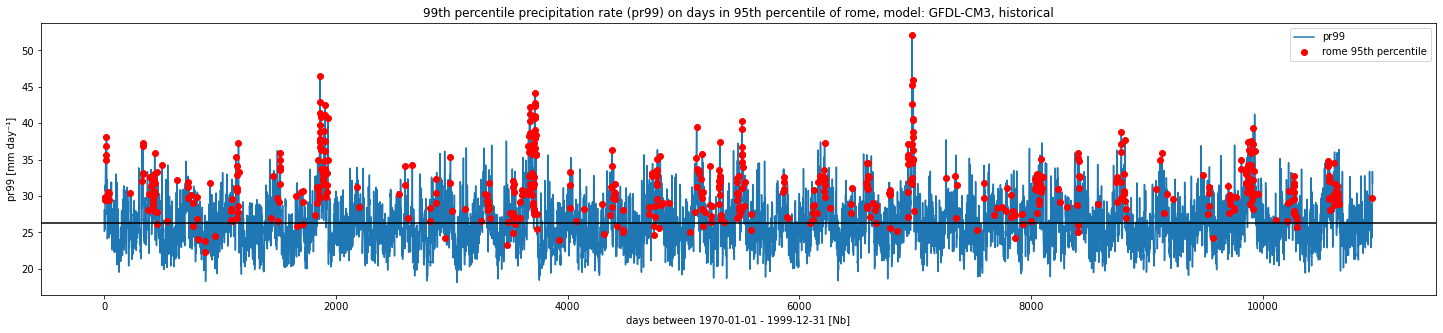

In [ ]:
f, ax = plt.subplots(figsize = (25,5))

y = prPercentiles[percentile_option].data
x= np.arange(0,len(y))

rome_threshold = 95
rome_prctile = np.percentile(rome[rome_option],rome_threshold)
x_rome= np.squeeze(np.argwhere(rome[rome_option].data>=rome_prctile))

ax.plot(x,y, label=percentile_option, zorder=0)
ax.scatter(x_rome,y[x_rome], label=rome_option + ' ' + str(rome_threshold) + 'th percentile', color='r')
ax.axhline(y=np.mean(y), color='k')
ax.set_title(percentile_option[-2:] + 'th percentile precipitation rate (' + percentile_option + ') on days in ' 
             + str(rome_threshold) + 'th percentile of '+ rome_option + ', model: ' + model + ', ' + experiment)
ax.set_xlabel('days between ' + str(prPercentiles[percentile_option].coords['time'][0].values)[:10] +' - '
                + str(prPercentiles[percentile_option].coords['time'][-1].values)[:10] + ' [Nb]')
ax.set_ylabel(percentile_option + ' [mm day' + chr(0x207B) + chr(0x00B9) + ']')
ax.legend()

#### numberIndex

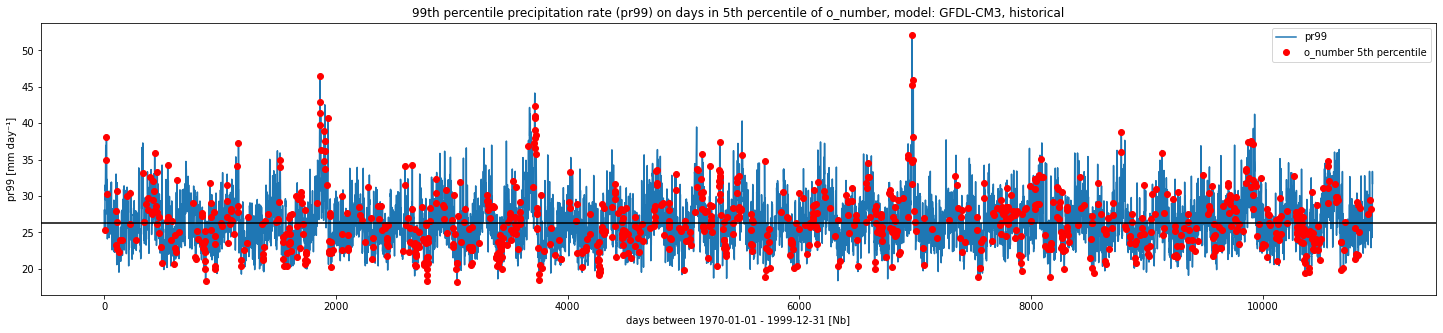

In [ ]:
f, ax = plt.subplots(figsize = (25,5))

y = prPercentiles[percentile_option].data
x= np.arange(0,len(y),1)

numberIndex_threshold = 5 # low number means high DOC
numberIndex_prctile = np.percentile(numberIndex[numberIndex_option],numberIndex_threshold)
x_numberIndex= np.squeeze(np.argwhere(numberIndex[numberIndex_option].data<=numberIndex_prctile))

ax.plot(x,y, zorder=0, label=percentile_option)
ax.scatter(x_numberIndex,y[x_numberIndex],label= numberIndex_option + ' ' + str(numberIndex_threshold) + 'th percentile', color='r')
ax.axhline(y=np.mean(y), color='k')
ax.set_title(percentile_option[-2:] + 'th percentile precipitation rate (' + percentile_option + ') on days in ' 
             + str(numberIndex_threshold) + 'th percentile of ' + numberIndex_option + ', model: ' + model + ', ' + experiment)
ax.set_xlabel('days between ' + str(prPercentiles[percentile_option].coords['time'][0].values)[:10] +' - '
                + str(prPercentiles[percentile_option].coords['time'][-1].values)[:10] + ' [Nb]')
ax.set_ylabel(percentile_option + ' [mm day' + chr(0x207B) + chr(0x00B9) + ']')
ax.legend()

In [ ]:
fig= plt.figure(figsize=(20,7.5))

lat = precip.lat
lon = precip.lon
lonm,latm = np.meshgrid(lon,lat)
conv_threshold = prPercentiles['pr97'].mean(dim=('time'))

numberIndex_threshold = 0.5
numberIndex_prctile = np.percentile(numberIndex[numberIndex_option],numberIndex_threshold)
x_numberIndex= np.squeeze(np.argwhere(numberIndex[numberIndex_option].data<=numberIndex_prctile))

def animate(frame):    
    ax = fig.add_subplot(projection=cartopy.crs.PlateCarree(central_longitude=180))

    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

    pr_day = precip.isel(time=x_numberIndex[frame])
    extreme_percentileDay = prPercentiles[percentile_option].isel(time=x_numberIndex[frame]).data

    ax.pcolormesh(lonm,latm, pr_day.where(pr_day>conv_threshold),transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Blues', vmin=0, vmax=80)
    pcm = ax.pcolormesh(lonm,latm, pr_day.where(pr_day>extreme_percentileDay),transform=cartopy.crs.PlateCarree(), cmap='Reds', vmin=10, vmax=80)

    ax.set_title(model + ': location of precipitation extremes (red) in convective regions (blue)')
    ax.set_xlabel('longitude')
    ax.set_ylabel('latitude')

    ax.set_yticks([-20, 0, 20])
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_xticklabels([0, 90, 180, 270, 360])

    plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.10, aspect=50, fraction=0.055, label = percentile_option + ' [mm/day]')
    plt.close()

ani2 = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=25,       # Could also be iterable or list
    interval=500     # ms between frames
    )

<Figure size 1440x540 with 0 Axes>

In [ ]:
# HTML(ani2.to_jshtml())